<a href="https://colab.research.google.com/github/Supriyo186/ML-MINOR-APRIL/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Preprocessing
# 1. Resize
# 2. Flatten
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/Machine Learning - Smartknowers/Minor Project'
CATEGORIES = ['Birds','Tigers']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) 
  path=os.path.join(DATADIR,category) 
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) 
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)




 
    

In [2]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

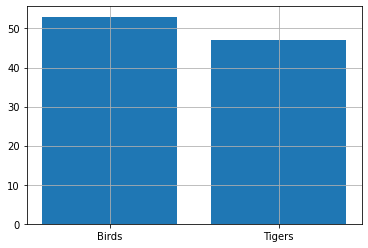

In [3]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)
plt.grid()

In [4]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size = 0.2,random_state = 120 )

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [{'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [6]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [7]:
y_test

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [9]:
accuracy_score(y_pred,y_test)

0.9

In [10]:
confusion_matrix(y_pred,y_test)

array([[9, 0],
       [2, 9]])

In [11]:
# Saving the model 
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [12]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Eopsaltria_australis_-_Mogo_Campground.jpg/1200px-Eopsaltria_australis_-_Mogo_Campground.jpg
(800, 1200, 3)
PREDICTED OUTPUT: Birds


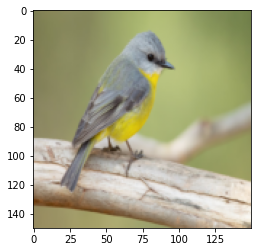

In [13]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')


In [14]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok


     |████████████████████████████████| 8.2MB 9.1MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
     |████████████████████████████████| 92kB 12.1MB/s 
     |████████████████████████████████| 174kB 51.1MB/s 
     |████████████████████████████████| 4.2MB 42.9MB/s 
     |████████████████████████████████| 112kB 52.5MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 
     |████████████████████████████████| 122kB 51.2MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [15]:
%%writefile imgcl.py
import streamlit as st
import numpy as np
import pickle
from PIL import Image
from skimage.io import imread
from skimage.transform import resize
st.title('Image Classifier using Machine Learning [Labels: Birds and Tigers]')
st.text('Upload image for prediction')
model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image...",type ="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT/CLASSIFY'):
    CATEGORIES = ['Birds','Tigers']
    st.write('RESULT...')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT: {y_out}')
    percent = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{ item } : {percent[0][index]*100}%')




Writing imgcl.py


In [16]:
!nohup streamlit run imgcl.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://acb0aec70567.ngrok.io'